<a href="https://colab.research.google.com/github/Computerglassformedandsurg/BRATS_SEGMENATION/blob/main/Brats_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Before uploading the code in the github repository, create a new file in the repository


# Get the zip file containing data in google drive and unzip it to google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import shutil

source_path = '/content/drive/MyDrive/Colab Notebooks/brats20-dataset-training-validation.zip'
destination_path = "/content/"

# Move the zip file from drive to colab
shutil.move(source_path, destination_path)

print(f"'{source_path}' moved to Drive at '{destination_path}'")


# q for quietly unzipping file suppressing the verbose list
!unzip -q brats20-dataset-training-validation.zip -d /content/data

'/content/drive/MyDrive/Colab Notebooks/brats20-dataset-training-validation.zip' moved to Drive at '/content/'


# Installing and Importing libraries

In [ ]:
!pip install nibabel

In [ ]:
import numpy as np
import nibabel as nib
import os
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imwrite

from sklearn.preprocessing import MinMaxScaler

# Understanding the data

In [ ]:
Train_data_path = "/content/data/BraTS2020_TrainingData/"
# loading nif file as npy

scaler = MinMaxScaler()


Apply Minmax scaler

reshapes the 3D data into a 2D matrix (combines all dimensions, keeping the last dimension as it is), applies the scaler, and then reshapes the data back to its original 3D shape.

In [ ]:
#Flair Image
file_path = os.path.join(Train_data_path,'MICCAI_BraTS2020_TrainingData', 'BraTS20_Training_355','BraTS20_Training_355_flair.nii' )
test_image_flair = nib.load(file_path).get_fdata()
test_image_flair1 = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

Doing the same for all the images

In [ ]:
# T1
file_path = os.path.join(Train_data_path,'MICCAI_BraTS2020_TrainingData', 'BraTS20_Training_355','BraTS20_Training_355_t1.nii' )
test_image_t1 = nib.load(file_path).get_fdata()
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

# T1CE
file_path = os.path.join(Train_data_path,'MICCAI_BraTS2020_TrainingData', 'BraTS20_Training_355','BraTS20_Training_355_t1ce.nii' )
test_image_t1ce = nib.load(file_path).get_fdata()
test_image_t1ce = scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

# T2
file_path = os.path.join(Train_data_path,'MICCAI_BraTS2020_TrainingData', 'BraTS20_Training_355','BraTS20_Training_355_t2.nii' )
test_image_t2 = nib.load(file_path).get_fdata()
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

# Mask
file_path = os.path.join(Train_data_path,'MICCAI_BraTS2020_TrainingData', 'BraTS20_Training_355','BraTS20_Training_355_seg.nii' )
test_mask = nib.load(file_path).get_fdata()
test_mask = test_mask.astype(np.uint8)
test_mask[test_mask==4] = 3

View Random slice to view it

In [ ]:
import random
n_slice = np.random.randint(0, test_mask.shape[2])

# # n_slice = 128 has mask
# n_slice = 128
print("slice no is:", n_slice)

slice no is: 128


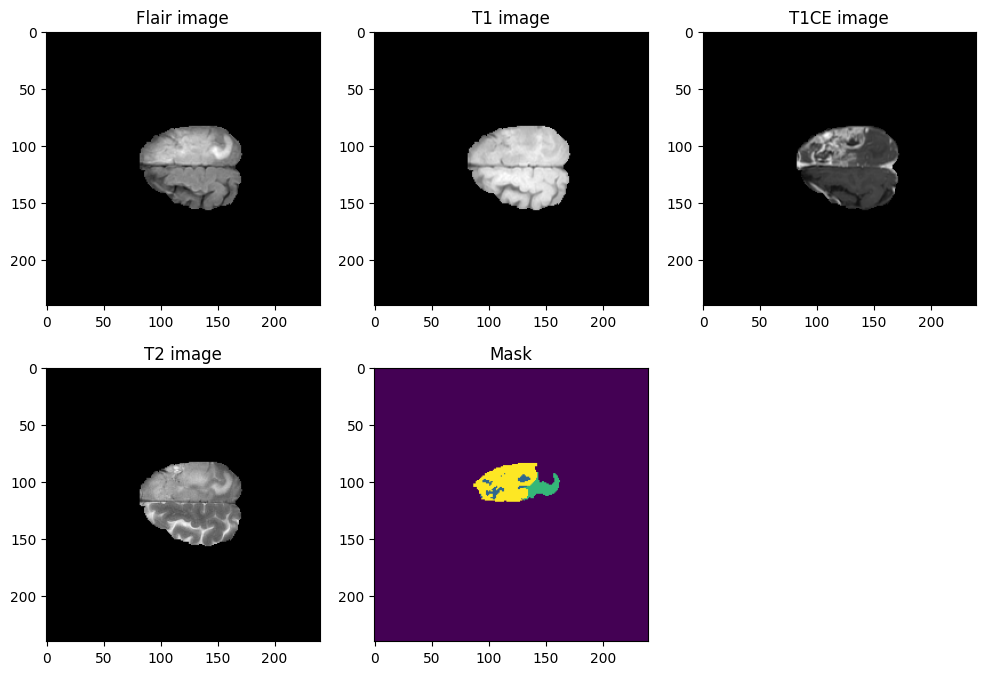

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:, :, n_slice], cmap= "gray")
plt.title("Flair image")

plt.subplot(232)
plt.imshow(test_image_t1[:, :, n_slice], cmap= "gray")
plt.title("T1 image")

plt.subplot(233)
plt.imshow(test_image_t1ce[:, :, n_slice], cmap= "gray")
plt.title("T1CE image")

plt.subplot(234)
plt.imshow(test_image_t2[:, :, n_slice], cmap= "gray")
plt.title("T2 image")

plt.subplot(235)
plt.imshow(test_mask[:, :, n_slice])
plt.title("Mask")

plt.show()



Combine the images as slices and divide them into patches

Note: Viewing the above images, Flair, T1CE and T2 has most information

In [ ]:
# combine the image
combined_image = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)

# Cropping the image to 128 x 128 x 128 x 3 to make it easier to divide them to patches of size 64 x 64
combined_cropped = combined_image[56:184, 56:184, 13:141]

#cropping mask to 128 x 128
test_mask = test_mask[56:184, 56:184, 13:141]

In [ ]:
print(test_image_flair.shape)
print(combined_image.shape)
print(combined_cropped.shape)



(240, 240, 155)
(240, 240, 155, 3)
(128, 128, 128, 3)


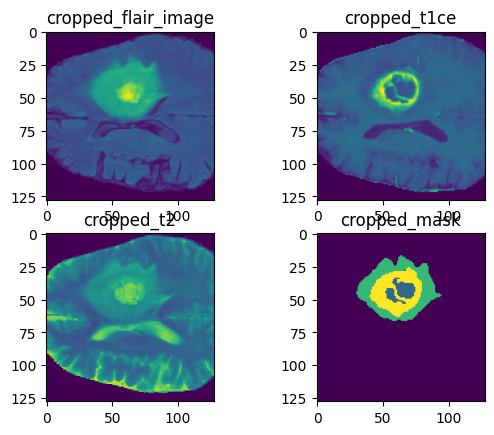

In [ ]:
# view the image
n_slice = np.random.randint(0, test_mask.shape[2])
# n_slice = 1

plt.subplot(221)
plt.imshow(combined_cropped[:,:,n_slice,0])
plt.title("cropped_flair_image")

plt.subplot(222)
plt.imshow(combined_cropped[:,:,n_slice,1])
plt.title("cropped_t1ce")

plt.subplot(223)
plt.imshow(combined_cropped[:,:,n_slice,2])
plt.title("cropped_t2")

plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title("cropped_mask")

plt.show()

***References***

*   **Code:**https://github.com/bnsreenu/python_for_microscopists/tree/master/231_234_BraTa2020_Unet_segmentation
* **Video:**https://www.youtube.com/watch?v=oB35sV1npVI&list=PLZsOBAyNTZwYgF8O1bTdV-lBdN55wLHDr&index=2

# Please open and read this before going further

The below cells are to download datasets from kaggle and upload it into google colab and then to google drive as zip file.

Everytime we revisit, we just have to run the first part of cells which get the zip file containing data from the drive and unzip the folder into the google colab

# Initiating new Kaggle API to download the Brats Data

In [ ]:
# !pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jaisilrose","key":"04e333b704a4341400adda79428f11fe"}'}

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# Kaggle to Colab- Method 1

---



In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("awsaf49/brats20-dataset-training-validation")

# print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brats20-dataset-training-validation' dataset.
Path to dataset files: /kaggle/input/brats20-dataset-training-validation


# Kaggle to Colab - Method 2


In [30]:
# !kaggle datasets download -d awsaf49/brats20-dataset-training-validation


In [31]:
# !unzip brats20-dataset-training-validation.zip -d /content/data

# Saving the zip file containing data in the google drive




In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# import shutil

# source_path = '/content/brats20-dataset-training-validation.zip'
# destination_path = '/content/drive/My Drive/Colab Notebooks/brats20-dataset-training-validation.zip'

# # Move the file
# shutil.move(source_path, destination_path)

# print(f"'{source_path}' moved to Drive at '{destination_path}'")

'/content/brats20-dataset-training-validation.zip' moved to Drive at '/content/drive/My Drive/Colab Notebooks/brats20-dataset-training-validation.zip'
